### 12. Apply boosting, bagging, random forests, and BART to a data set of your choice. Be sure to ft the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?

In [1]:
import numpy as np
import pandas as pd
from ISLP import load_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score

In [2]:
df = load_data('Smarket')
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [3]:
x = df.drop('Direction', axis=1)
y = df['Direction']

##### find which predicted percent is best to predict direction:

In [4]:
logit = LogisticRegression().fit(x, y)
logit.classes_

array(['Down', 'Up'], dtype=object)

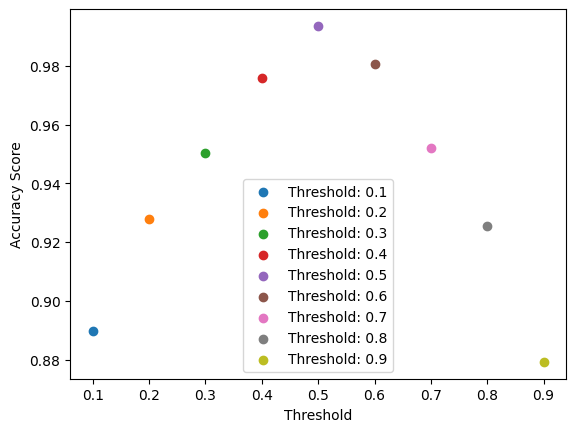

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
logit = LogisticRegression().fit(x, y)
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    predicted_probs = cross_val_predict(logit, x, y, cv=5, method='predict_proba')
    yhat = np.where(predicted_probs[:, 1] >= i, 'Up', 'Down')
    plt.scatter(i, accuracy_score(y, yhat), label=f'Threshold: {i}')
plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.legend()

##### function to print cv accuracy:

In [6]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, n_splits=5, random_state=42)
def cvscore (model, modelname):
    accuracy = np.average(cross_val_score(model, x, y, cv=kf, scoring='accuracy'))
    print(f'{modelname}:', accuracy)

In [7]:
cvscore(GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01), 'Boosting')
cvscore(BaggingClassifier(n_estimators=1000), 'Bagging')
cvscore(RandomForestClassifier(n_estimators=1000, max_features=np.sqrt(x.shape[1]).astype(int)),
        'Random Forest')
cvscore(LogisticRegression(), 'Logistic Regression')

Boosting: 0.9984
Bagging: 0.9984
Random Forest: 0.9992000000000001
Logistic Regression: 0.9936


##### predicting up everytime will be right this % of the time:

In [8]:
np.sum(y == 'Up') / y.shape[0]

0.5184